In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import csv
import requests
import gmaps
import os
from api_keys import api_key

In [2]:
# read the air pollution file
air_death_df = pd.read_csv('../resources/7.8.20 UCSD Group Project Dataset - death-rates-from-air-pollution.csv')
# read the happiness files
happiness_2015_raw_df = pd.read_csv('../resources/2015_happiness_data.csv')
happiness_2016_raw_df = pd.read_csv('../resources/2016_happiness_data.csv')
happiness_2017_raw_df = pd.read_csv('../resources/2017_happiness_data.csv')

In [3]:
happiness_2015_raw_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
# Renamed columns
air_death_df = air_death_df.rename(columns={'Entity': 'Country', 'Air pollution (total) (deaths per 100,000)': 'Air Pollution Deaths Per 100k'})
# Dropped un-needed columns
air_death_df2 = air_death_df.drop(['Code', 'Indoor air pollution (deaths per 100,000)', 'Outdoor particulate matter (deaths per 100,000)', 
                         'Outdoor ozone pollution (deaths per 100,000)'], axis=1)
# Reformatted the decimal pointin the air polution column by assigning the column I want to format and then using the 
# .map().format function ont the called column
air_death_df2['Air Pollution Deaths Per 100k'] = air_death_df2['Air Pollution Deaths Per 100k'].map('{:,.2f}'.format)
# Convert string into a float using .astype() function. Ps - this could have been done on the line above as a chain
air_death_df2['Air Pollution Deaths Per 100k'] = air_death_df2['Air Pollution Deaths Per 100k'].astype(float)
air_death_df2

,Country,Year,Air Pollution Deaths Per 100k
0,Afghanistan,1990,299.48
1,Afghanistan,1991,291.28
2,Afghanistan,1992,278.96
3,Afghanistan,1993,278.79
4,Afghanistan,1994,287.16
...,...,...,...
6463,Zimbabwe,2013,143.85
6464,Zimbabwe,2014,138.20
6465,Zimbabwe,2015,132.75
6466,Zimbabwe,2016,128.69


In [6]:
# Remove data from years 1990-2014
# first set the inde
index_df = air_death_df2.set_index('Year')
index_df

,Country,Air Pollution Deaths Per 100k
Year,,
1990,Afghanistan,299.48
1991,Afghanistan,291.28
1992,Afghanistan,278.96
1993,Afghanistan,278.79
1994,Afghanistan,287.16
...,...,...
2013,Zimbabwe,143.85
2014,Zimbabwe,138.20
2015,Zimbabwe,132.75


In [7]:
# Remove data from years 1990-2014
# use .drop() and set the range(1990, 2015)
clean_year_df = index_df.drop(range(1990, 2015), axis=0).drop(2017)
# reset the index
clean_year_df = clean_year_df.reset_index()
clean_year_df.shape # check the shape to see if rows were deleted
clean_year_df

,Year,Country,Air Pollution Deaths Per 100k
0,2015,Afghanistan,191.80
1,2016,Afghanistan,186.67
2,2015,Albania,42.30
3,2016,Albania,41.02
4,2015,Algeria,44.36
...,...,...,...
457,2016,Yemen,97.02
458,2015,Zambia,102.52
459,2016,Zambia,100.57
460,2015,Zimbabwe,132.75


In [8]:
clean_year_df.to_csv('air_pol_year_clean.csv')

In [9]:
# Pull the years data 2015 and 2016
air_death_2015 = clean_year_df[clean_year_df['Year'] == 2015]
air_death_2016 = clean_year_df[clean_year_df['Year'] == 2016]
air_death_2015

,Year,Country,Air Pollution Deaths Per 100k
0,2015,Afghanistan,191.80
2,2015,Albania,42.30
4,2015,Algeria,44.36
6,2015,American Samoa,60.80
8,2015,Andean Latin America,34.60
...,...,...,...
452,2015,Western Sub-Saharan Africa,107.15
454,2015,World,67.08
456,2015,Yemen,99.42
458,2015,Zambia,102.52


In [10]:
air_2015_df = air_death_2015.sort_values('Air Pollution Deaths Per 100k', ascending=False)
air_2015_df = air_2015_df.drop(['Year'], axis=1)
air_2015_df.columns = ['Country', '2015 Air Pollution Deaths Per 100k']
air_2016_df = air_death_2016.sort_values('Air Pollution Deaths Per 100k', ascending=False)
air_2016_df = air_2016_df.drop(['Year'], axis=1)
air_2016_df.columns = ['Country', '2016 Air Pollution Deaths Per 100k']
air_2016_df

,Country,2016 Air Pollution Deaths Per 100k
317,Papua New Guinea,249.27
75,Central African Republic,202.46
307,Oceania,198.84
365,Solomon Islands,189.48
1,Afghanistan,186.67
...,...,...
21,Australasia,10.29
189,Iceland,9.92
397,Sweden,9.28
287,New Zealand,8.65


In [11]:
#create one datafram with the columns: country, 2015 deaths, 2016 deaths. 
air_quality_df = air_2015_df.merge(air_2016_df, on = 'Country', how = 'inner')
air_quality_df

,Country,2015 Air Pollution Deaths Per 100k,2016 Air Pollution Deaths Per 100k
0,Papua New Guinea,254.73,249.27
1,Central African Republic,205.85,202.46
2,Oceania,203.30,198.84
3,Solomon Islands,192.32,189.48
4,Afghanistan,191.80,186.67
...,...,...,...
226,Australasia,10.99,10.29
227,Iceland,10.74,9.92
228,Sweden,9.85,9.28
229,New Zealand,9.38,8.65


In [12]:
air_quality_df.to_csv('jay_pollution_deaths.csv')

In [23]:
happiness_2015_df = happiness_2015_raw_df[['Country', 'Happiness Rank', 'Happiness Score']]
happiness_2015_df.columns = ['Country', '2015 Happiness Rank', '2015 Happiness Score']
happiness_2016_df = happiness_2016_raw_df[['Country', 'Happiness Rank', 'Happiness Score']]
happiness_2016_df.columns = ['Country', '2016 Happiness Rank', '2016 Happiness Score']

happiness_2015_df

,Country,2015 Happiness Rank,2015 Happiness Score
0,Switzerland,1,7.587
1,Iceland,2,7.561
2,Denmark,3,7.527
3,Norway,4,7.522
4,Canada,5,7.427
...,...,...,...
153,Rwanda,154,3.465
154,Benin,155,3.340
155,Syria,156,3.006
156,Burundi,157,2.905


In [25]:
happiness_2015_2016_df = happiness_2015_df.merge(happiness_2016_df, on='Country', how='inner')
happiness_2015_2016_df

,Country,2015 Happiness Rank,2015 Happiness Score,2016 Happiness Rank,2016 Happiness Score
0,Switzerland,1,7.587,2,7.509
1,Iceland,2,7.561,3,7.501
2,Denmark,3,7.527,1,7.526
3,Norway,4,7.522,4,7.498
4,Canada,5,7.427,6,7.404
...,...,...,...,...,...
146,Rwanda,154,3.465,152,3.515
147,Benin,155,3.340,153,3.484
148,Syria,156,3.006,156,3.069
149,Burundi,157,2.905,157,2.905


In [26]:
pollution_deaths_to_happiness_df = happiness_2015_2016_df.merge(air_quality_df, on='Country', how='inner')
pollution_deaths_to_happiness_df

,Country,2015 Happiness Rank,2015 Happiness Score,2016 Happiness Rank,2016 Happiness Score,2015 Air Pollution Deaths Per 100k,2016 Air Pollution Deaths Per 100k
0,Switzerland,1,7.587,2,7.509,12.92,11.98
1,Iceland,2,7.561,3,7.501,10.74,9.92
2,Denmark,3,7.527,1,7.526,19.89,19.32
3,Norway,4,7.522,4,7.498,11.47,10.86
4,Canada,5,7.427,6,7.404,12.22,11.00
...,...,...,...,...,...,...,...
139,Rwanda,154,3.465,152,3.515,100.56,98.50
140,Benin,155,3.340,153,3.484,119.29,115.81
141,Syria,156,3.006,156,3.069,65.14,64.84
142,Burundi,157,2.905,157,2.905,146.91,144.36


In [27]:
pollution_deaths_to_happiness_df.to_csv('pollution_deaths_to_happiness.csv')

In [28]:
#create a heatmap with deaths using api calls
countries = pollution_deaths_to_happiness_df['Country']
countries

0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
139         Rwanda
140          Benin
141          Syria
142        Burundi
143           Togo
Name: Country, Length: 144, dtype: object

In [29]:
# slice dataframes with just target countries

In [30]:
# do a function def() to plot all the scatter plots
# do a regression line
# get a ptest
# do subplots

In [37]:
def regress_func(x_axis, y_axis, xlabel, ylabel, table_name, fig_name):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    line = slope * x_axis + intercept
    plt.scatter(x_axis, y_axis, alpha=.6, edgecolor='black')
    plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(table_name)
    plt.legend()
    plt.grid()
    print(f"The P-value is {pvalue} and R-squared value {rvalue*rvalue}")
    plt.savefig(fig_name)

The P-value is 2.487985031450844e-30 and R-squared value 0.6036555236444642


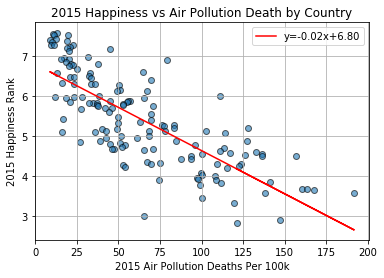

In [38]:
regress_func(pollution_deaths_to_happiness_df['2015 Air Pollution Deaths Per 100k'],
             pollution_deaths_to_happiness_df['2015 Happiness Score'],
             '2015 Air Pollution Deaths Per 100k',
             '2015 Happiness Rank',
             '2015 Happiness vs Air Pollution Death by Country',
             'fig_happines_airdeath2015'
            )

In [39]:
# Write analysis

The P-value is 1.981341515174934e-32 and R-squared value 0.6296289779059633


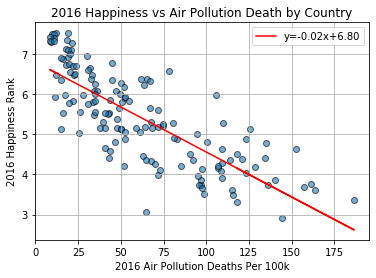

In [40]:
regress_func(pollution_deaths_to_happiness_df['2016 Air Pollution Deaths Per 100k'],
             pollution_deaths_to_happiness_df['2016 Happiness Score'],
             '2016 Air Pollution Deaths Per 100k',
             '2016 Happiness Rank',
             '2016 Happiness vs Air Pollution Death by Country',
             'fig_happines_airdeath2016'
            )

In [41]:
# Write analysis

In [50]:
# Setup data for heat map
# pull lat and long for each country
# create a loop
# create a new column in the dataframe
pollution_deaths_to_happiness_df['Latitude'] = ''
pollution_deaths_to_happiness_df['Longitude'] = ''

for index, row in pollution_deaths_to_happiness_df.iterrows():
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={country}&key={api_key}"
    country = row['Country']
    request = requests.get(url).json()
    pollution_deaths_to_happiness_df.loc[index, 'Latitude'] = request['results'][0]['geometry']['location']['lat']
    pollution_deaths_to_happiness_df.loc[index, 'Longitude'] = request['results'][0]['geometry']['location']['lng']

pollution_deaths_to_happiness_df

,Country,2015 Happiness Rank,2016 Happiness Rank,2015 Air Pollution Deaths Per 100k,2016 Air Pollution Deaths Per 100k,Latitude,Longitude
0,Switzerland,1,2,12.92,11.98,8.61954,0.824782
1,Iceland,2,3,10.74,9.92,46.8182,8.22751
2,Denmark,3,1,19.89,19.32,64.9631,-19.0208
3,Norway,4,4,11.47,10.86,56.2639,9.50178
4,Canada,5,6,12.22,11.00,60.472,8.46895
...,...,...,...,...,...,...,...
139,Rwanda,154,152,100.56,98.50,33.9391,67.71
140,Benin,155,153,119.29,115.81,-1.94028,29.8739
141,Syria,156,156,65.14,64.84,9.30769,2.31583
142,Burundi,157,157,146.91,144.36,34.8021,38.9968


In [42]:
pollution_deaths_to_happiness_df.to_csv('pollution_deaths_lat_lon.csv')

In [61]:

# Store latitiude and longitude in locations variable
locations = pollution_deaths_to_happiness_df[['Latitude', 'Longitude']]
# Store humidty data as the weight
deaths = pollution_deaths_to_happiness_df['2015 Air Pollution Deaths Per 100k']
# Configure gmap
gmaps.configure(api_key=api_key)
figure = gmaps.figure(zoom_level=1.5, center=(0,0))
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=deaths, 
                                 dissipating=False, point_radius=3,
                                 max_intensity=max(pollution_deaths_to_happiness_df['2015 Air Pollution Deaths Per 100k']))
                                 
# # Add heat map layer to fig with .add_layer() function
figure.add_layer(heat_layer)
# # Display figure
figure

Figure(layout=FigureLayout(height='420px'))

In [57]:
pollution_deaths_to_happiness_df.index


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            134, 135, 136, 137, 138, 139, 140, 141, 142, 143],
           dtype='int64', length=144)